In [1]:
from typing import Any

from keras.layers import Input, SimpleRNN, Dense, Flatten
from keras.models import Model

# from keras.optimizers import Adam
from keras.optimizers.legacy import Adam  # For compatibility with mac

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Series without noise
series = np.sin(0.1 * np.arange(200))

# Series with noise
series_noisy = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

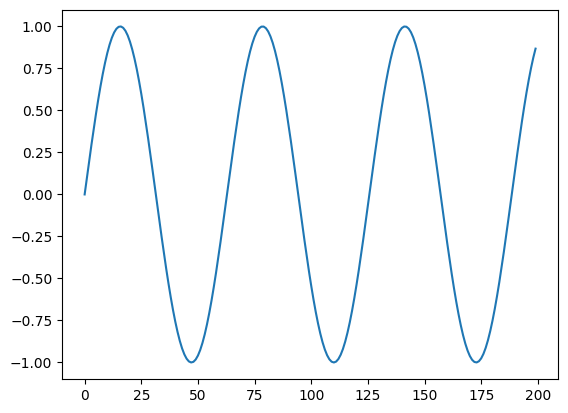

In [3]:
# Plotting noiseless series
plt.plot(series)
plt.show()

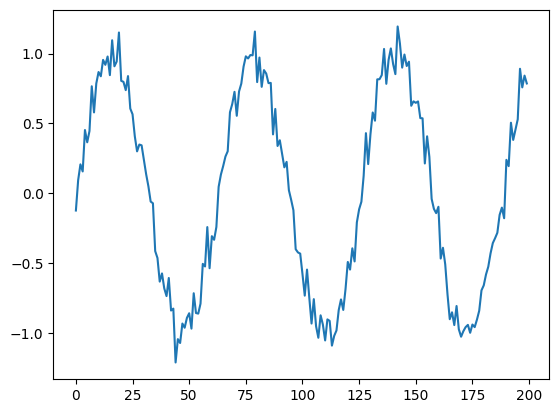

In [4]:
# Plotting series with noise
plt.plot(series_noisy)
plt.show()

In [5]:
def create_dataset_from_series(series: np.ndarray, time_steps: int) -> Any:
    # Initializing lists
    X = []
    Y = []

    # Creating data by iterating over series
    for t in range(len(series) - time_steps):  # Limiting the samples
        x = series[t : t + time_steps]
        X.append(x)
        y = series[t + time_steps]
        Y.append(y)

    X = np.array(X).reshape(
        -1, time_steps, 1
    )  # -1 means to infer the size from the array
    Y = np.array(Y)

    return X, Y

In [6]:
# Building the dataset

# Setting dimensions
T = 10
D = 1

# Creating data splits
X, Y = create_dataset_from_series(series, T)
X_noisy, Y_noisy = create_dataset_from_series(series_noisy, T)

N = len(X)

# Checking shapes
print(
    f'X_shape (normal, noisy): {X.shape}, {X_noisy.shape} | Y_shape (normal, noisy): {Y.shape}, {Y_noisy.shape}'
)

X_shape (normal, noisy): (190, 10, 1), (190, 10, 1) | Y_shape (normal, noisy): (190,), (190,)


In [7]:
# Trying an autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5)(i)
x = Dense(1)(x)

model = Model(i, x)
model_noisy = Model(i, x)

In [8]:
# Compiling the model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))
model_noisy.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

In [9]:
# Training the model without noise
r = model.fit(
    X[: -N // 2],
    Y[: -N // 2],
    epochs=80,
    validation_data=(X[-N // 2 :], Y[-N // 2 :]),
)

Epoch 1/80
3/3 [==============================] - 0s 39ms/step - loss: 0.1914 - val_loss: 0.0740
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0746 - val_loss: 0.0539
Epoch 3/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0441 - val_loss: 0.0515
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0440 - val_loss: 0.0202
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0387
Epoch 6/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0164
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0121
Epoch 8/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.0050
Epoch 9/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0095
Epoch 10/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 11/80
3/3 [=====================

In [10]:
# Training the model without noise
r_noisy = model_noisy.fit(
    X_noisy[: -N // 2],
    Y_noisy[: -N // 2],
    epochs=80,
    validation_data=(
        X_noisy[-N // 2 :],
        Y_noisy[-N // 2 :],
    ),
)

Epoch 1/80
3/3 [==============================] - 0s 34ms/step - loss: 0.1191 - val_loss: 0.0781
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0859 - val_loss: 0.1331
Epoch 3/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1149 - val_loss: 0.0505
Epoch 4/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.0576
Epoch 5/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0499
Epoch 6/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.0477
Epoch 7/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0406 - val_loss: 0.0390
Epoch 8/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0317
Epoch 9/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.0425
Epoch 10/80
3/3 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.0299
Epoch 11/80
3/3 [=====================

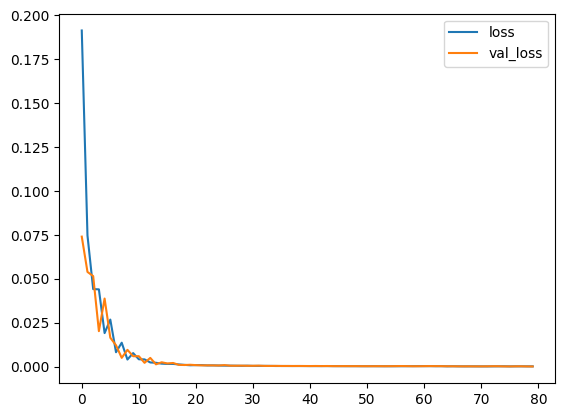

In [11]:
# Plotting loss for model series noise
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

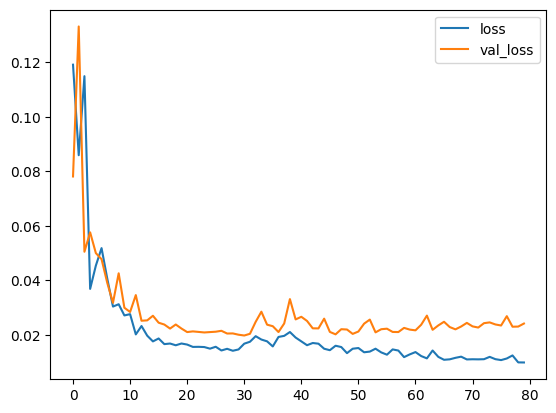

In [12]:
# Plotting loss for model series noise
plt.plot(r_noisy.history['loss'], label='loss')
plt.plot(r_noisy.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [13]:
# Wrong forecast using true targets

validation_target_1 = Y[-N // 2 :]
validation_target_1_noisy = Y_noisy[-N // 2 :]
validation_predictions_1 = []
validation_predictions_1_noisy = []

# Index of first validation input
i = -N // 2

while len(validation_predictions_1) < len(validation_target_1):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    p_noisy = model_noisy.predict(X_noisy[i].reshape(1, -1))[0, 0]
    i += 1

    validation_predictions_1.append(p)
    validation_predictions_1_noisy.append(p_noisy)

1/1 [==============================] - 0s 7ms/step


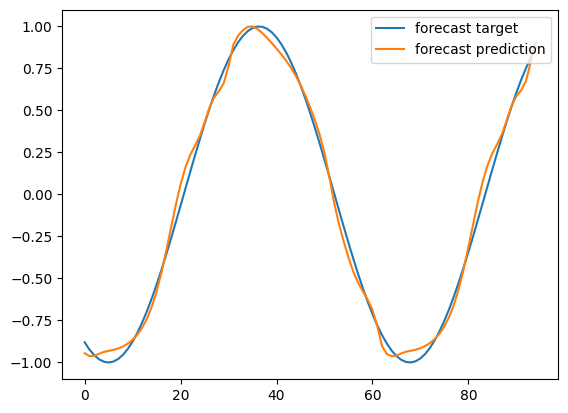

In [14]:
# Plotting predictions for normal sine
plt.plot(validation_target_1, label='forecast target')
plt.plot(validation_predictions_1, label='forecast prediction')
plt.legend()
plt.show()

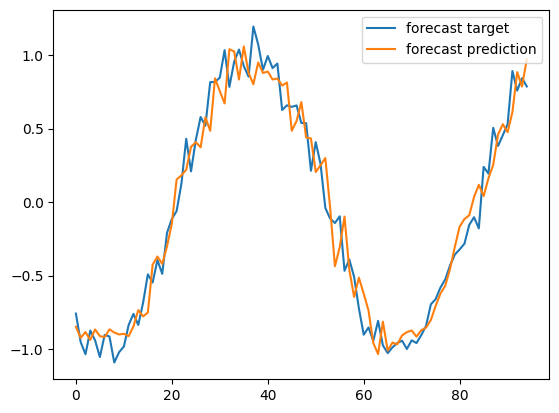

In [15]:
# Plotting predictions for noisy sine
plt.plot(validation_target_1_noisy, label='forecast target')
plt.plot(validation_predictions_1_noisy, label='forecast prediction')
plt.legend()
plt.show()

In [19]:
# Correct forecasting, using only the last input vector and the predictions themselves

validation_target_2 = Y[-N // 2 :]
validation_target_2_noisy = Y_noisy[-N // 2 :]
validation_predictions_2 = []
validation_predictions_2_noisy = []

# Last train input
last_x = X[-N // 2]
last_x_noisy = X_noisy[-N // 2]

while len(validation_predictions_2) < len(validation_target_2):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    p_noisy = model_noisy.predict(last_x_noisy.reshape(1, -1))[0, 0]

    # Updating the predictions list
    validation_predictions_2.append(p)
    validation_predictions_2_noisy.append(p_noisy)

    # make the new input by shifting the array to the left
    last_x = np.roll(last_x, -1)
    last_x_noisy = np.roll(last_x_noisy, -1)

    # Updating the latest prediction with our value
    last_x[-1] = p
    last_x_noisy[-1] = p_noisy

1/1 [==============================] - 0s 7ms/step


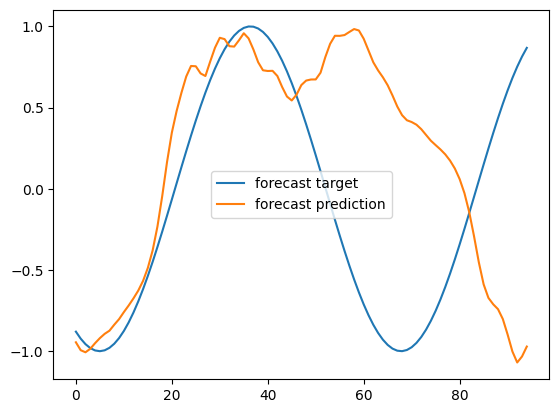

In [20]:
# Plotting normal sine wave predictions
plt.plot(validation_target_2, label='forecast target')
plt.plot(validation_predictions_2, label='forecast prediction')
plt.legend()
plt.show()

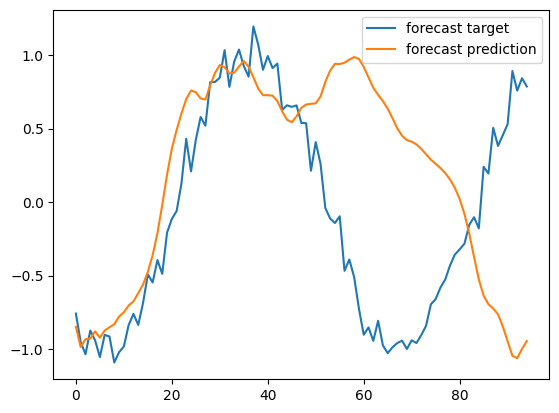

In [21]:
# Plotting noisy sine wave predictions
plt.plot(validation_target_2_noisy, label='forecast target')
plt.plot(validation_predictions_2_noisy, label='forecast prediction')
plt.legend()
plt.show()